<a href="https://colab.research.google.com/github/billyherringtondungeonmaster/LinearAlgebra/blob/main/LinearAlgebraLitvinov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Easy level**

*Я пользовался тем, что файл в GoogleColab предоставляет единое пространство имён для функций, так что если вылезает ошибка "функция не определена" - значит, нужно последовательно запустить код выше (функция была определена в блоках кода ранее).*

**Поиск палиндромов (и квадратных палиндромов) до 10^5 и циклически простых до 10^6:**

In [ ]:
def primes_in_range(limit: int) -> list[int]:
    if limit < 2:
        return []

    sieve = [True] * limit
    sieve[0] = sieve[1] = False

    for i in range(2, int(limit ** 0.5) + 1):
        if sieve[i]:
            sieve[i * i: limit: i] = [False] * len(sieve[i * i: limit: i])

    return [i for i in range(2, limit) if sieve[i]]


def square_palindromes() -> list[int]:
    seq = []
    for a in range(10):
        seq.append(a)
        seq.append(int(str(a)*2))
        for b in range(10):
            seq.append(int(str(b) + str(a) + str(b)))
            seq.append(int(str(b) + str(a) * 2 + str(b)))
            for c in range(10):
                seq.append(int(str(c) + str(b) + str(a) + str(b) + str(c)))

    seq = list(set(seq))
    seq.sort()

    new_seq = []
    for i in seq:
        sq = str(i ** 2)
        if sq == sq[::-1]:
            new_seq.append(i)

    return new_seq



def circular_primes(limit: int = 10**6) -> list[int]:

    primes = primes_in_range(limit)

    sieve = [False] * limit
    for p in primes:
        sieve[p] = True

    def rotations(n: int) -> list[int]:
        s = str(n)
        return [int(s[i:] + s[:i]) for i in range(len(s))]

    circular = []
    for p in primes:
        # Проверяем все циклические сдвиги
        rots = rotations(p)
        # Все сдвиги должны быть простыми И находиться в пределах [2, limit)
        if all(r < limit and sieve[r] for r in rots):
            circular.append(p)

    return circular


def palindromic_squares_and_circular_primes() -> tuple[list[int], list[int]]:
    """
    Возвращает:
    tuple:
    - список всех палиндромов a < 100000, для которых a^2 — палиндром;
    - список всех простых p < 1000000, все циклические перестановки цифр которых
    ,→ просты.
    """
    return square_palindromes(), circular_primes()


print(palindromic_squares_and_circular_primes())

([0, 1, 2, 3, 11, 22, 101, 111, 121, 202, 212, 1001, 1111, 2002, 10001, 10101, 10201, 11011, 11111, 11211, 20002, 20102], [2, 3, 5, 7, 11, 13, 17, 31, 37, 71, 73, 79, 97, 113, 131, 197, 199, 311, 337, 373, 719, 733, 919, 971, 991, 1193, 1931, 3119, 3779, 7793, 7937, 9311, 9377, 11939, 19391, 19937, 37199, 39119, 71993, 91193, 93719, 93911, 99371, 193939, 199933, 319993, 331999, 391939, 393919, 919393, 933199, 939193, 939391, 993319, 999331])


**Поиск кубических палиндромов до 10^5 и палиндромических простых до 10000 включительно:**

In [ ]:

def cubic_palindromes() -> list[int]:
    seq = []
    for a in range(10):
        seq.append(a)
        seq.append(int(str(a)*2))
        for b in range(10):
            seq.append(int(str(b) + str(a) + str(b)))
            seq.append(int(str(b) + str(a) * 2 + str(b)))
            for c in range(10):
                seq.append(int(str(c) + str(b) + str(a) + str(b) + str(c)))

    seq = list(set(seq))
    seq.sort()

    new_seq = []
    for i in seq:
        sq = str(i ** 3)
        if sq == sq[::-1]:
            new_seq.append(i)

    return new_seq


def palindromic_primes() -> list[int]:
    list_of_primes = primes_in_range(10001)
    list_of_palindromic_primes = []
    for i in list_of_primes:
        if str(i) == str(i)[::-1]:
            list_of_palindromic_primes.append(i)
    return list_of_palindromic_primes


def palindromic_cubes_and_palindromic_primes() -> tuple[list[int], list[int]]:
    """
    Возвращает:
    tuple:
    - список всех палиндромов a < 100000, для которых a^3 — палиндром;
    - список всех простых p <= 10000, которые являются палиндромами.
    """
    return cubic_palindromes(), palindromic_primes()


print(palindromic_cubes_and_palindromic_primes())

([0, 1, 2, 7, 11, 101, 111, 1001, 10001, 10101, 11011], [2, 3, 5, 7, 11, 101, 131, 151, 181, 191, 313, 353, 373, 383, 727, 757, 787, 797, 919, 929])


**Поиск первые 100 простых чисел, состоящих только из цифр 1 и 3; 1 и 5; 1 и 7; 1 и 9.**

Проанализируйте, какие из этих типов встречаются реже всего и почему.

In [ ]:
def is_prime(number: int) -> bool:
    if number < 2:
        return False
    if number == 2:
        return True
    if number % 2 == 0:
        return False
    for i in range(3, int(number ** 0.5) + 1):
        if number % i == 0:
            return False
    return True


def primes_with_two_digits() -> dict[str, list[int]]:
    """
    Возвращает словарь:
    {
        '13': [первые 100 простых чисел, состоящих только из цифр 1 и 3],
        '15': [... только из 1 и 5 ...],
        '17': [... только из 1 и 7 ...],
        '19': [... только из 1 и 9 ...]
    }
    """
    result = {}
    target_count = 100

    for d in [3, 5, 7, 9]:
        key = f"1{d}"
        allowed_digits = [1, d]
        primes = []

        # Длина чисел: начинаем с 1 цифры
        length = 1

        while len(primes) < target_count:
            # Генерируем ВСЕ числа длины `length`, составленные из цифры из allowed_digits
            # Используем очередь строк: начинаем с однозначных, затем наращиваем
            current_strings = [str(x) for x in allowed_digits]  # ['1', '3'] и т.п.

            # Если нам нужна длина > 1 — делаем (length - 1) раундов наращивания
            for z in range(1, length):
                next_strings = []
                for s in current_strings:
                    for digit in allowed_digits:
                        next_strings.append(s + str(digit))
                current_strings = next_strings

            # Теперь current_strings — все строки длины `length`
            for s in current_strings:
                num = int(s)
                if is_prime(num):
                    primes.append(num)
                    if len(primes) == target_count:
                        break  # выход из for, затем из while

            length += 1

        # Сортируем для единообразия (например: 3 < 11 < 13 < 31 < ...)
        primes.sort()
        result[key] = primes

    return result


print(primes_with_two_digits())

{'13': [3, 11, 13, 31, 113, 131, 311, 313, 331, 3313, 3331, 11113, 11131, 11311, 13313, 13331, 31333, 33113, 33311, 33331, 113111, 113131, 131111, 131113, 131311, 311111, 313133, 313331, 313333, 331333, 333131, 333331, 1111333, 1131113, 1131131, 1131133, 1131331, 1133131, 1133333, 1311131, 1311311, 1313311, 1331333, 1333133, 1333313, 1333331, 3111131, 3111313, 3111331, 3113111, 3113333, 3131113, 3131311, 3133111, 3133331, 3311131, 3331331, 3331333, 3333131, 3333133, 3333311, 3333313, 3333331, 11111131, 11111311, 11113111, 11131111, 11311133, 11313311, 11313331, 11331311, 11333111, 11333131, 13111333, 13131133, 13131331, 13133111, 13133311, 13311113, 13311313, 31111313, 31113113, 31113311, 31133131, 31311113, 31311131, 31333333, 33111311, 33113111, 33113131, 33313333, 33333133, 33333331, 111111113, 111111131, 111111313, 111111331, 111113111, 111113113, 111113131], '15': [5, 11, 151, 1151, 1511, 11551, 15511, 15551, 51151, 51511, 51551, 55511, 115151, 511111, 511151, 515111, 1111151, 111

В порядке возрастания редкости:
1.   **{1, 3}**
2.   **{1, 9}**
3.   **{1, 7}**
4.   **{1, 5}**

**{1, 5}**: самый редкий, потому что любое число из оканчивающихся на 5 (кроме самого 5) автоматически не явл. простым (половина из представленных чисел)

**Средняя разность**: ~15.3 млн

**Максимальная разность**: ~555 млн

**Стандартное отклонение**: ~74.3 млн - числа очень редко попадают в простые.

**{1, 7}**: второй по редкости. Числа быстро улетают вверх, их плотность среди всех натуральных чисел мала. Простые числа в этом множестве разбросаны по числовой прямой очень неравномерно - отсюда огромные разности и стандартное отклонение.

**{1, 9}** - нет проблем с делимостью, просто растёт немного быстрее чем **{1, 3}**.

**{1, 3}** - самый частый: много малых простых, малые разности, высокая плотность.

(здесь "*растёт быстрее*" = в мн-ве чисел с одинаковым количеством цифр больше простых из **{1, d1}** чем из **{1, d2}**)

Ниже визуализация и статистика.

Генерация простых чисел из пар цифр...

Статистика разностей:
----------------------------------------
Цифры {1, 3}:
  Средняя разность: 1122536.57
  Максимальная разность: 77777782
  Минимальная разность: 2
  Стандартное отклонение: 7985024.33
  Уникальных разностей: 46

Цифры {1, 5}:
  Средняя разность: 15267829.29
  Максимальная разность: 555564000
  Минимальная разность: 40
  Стандартное отклонение: 74319190.36
  Уникальных разностей: 55

Цифры {1, 7}:
  Средняя разность: 11229466.32
  Максимальная разность: 1033339994
  Минимальная разность: 6
  Стандартное отклонение: 103389925.13
  Уникальных разностей: 46

Цифры {1, 9}:
  Средняя разность: 1939304.93
  Максимальная разность: 71119200
  Минимальная разность: 8
  Стандартное отклонение: 10088092.43
  Уникальных разностей: 62


Корреляции между наборами:
------------------------------
13 vs 15: 0.018
13 vs 17: -0.015
13 vs 19: -0.027
15 vs 17: -0.017
15 vs 19: -0.038
17 vs 19: -0.020


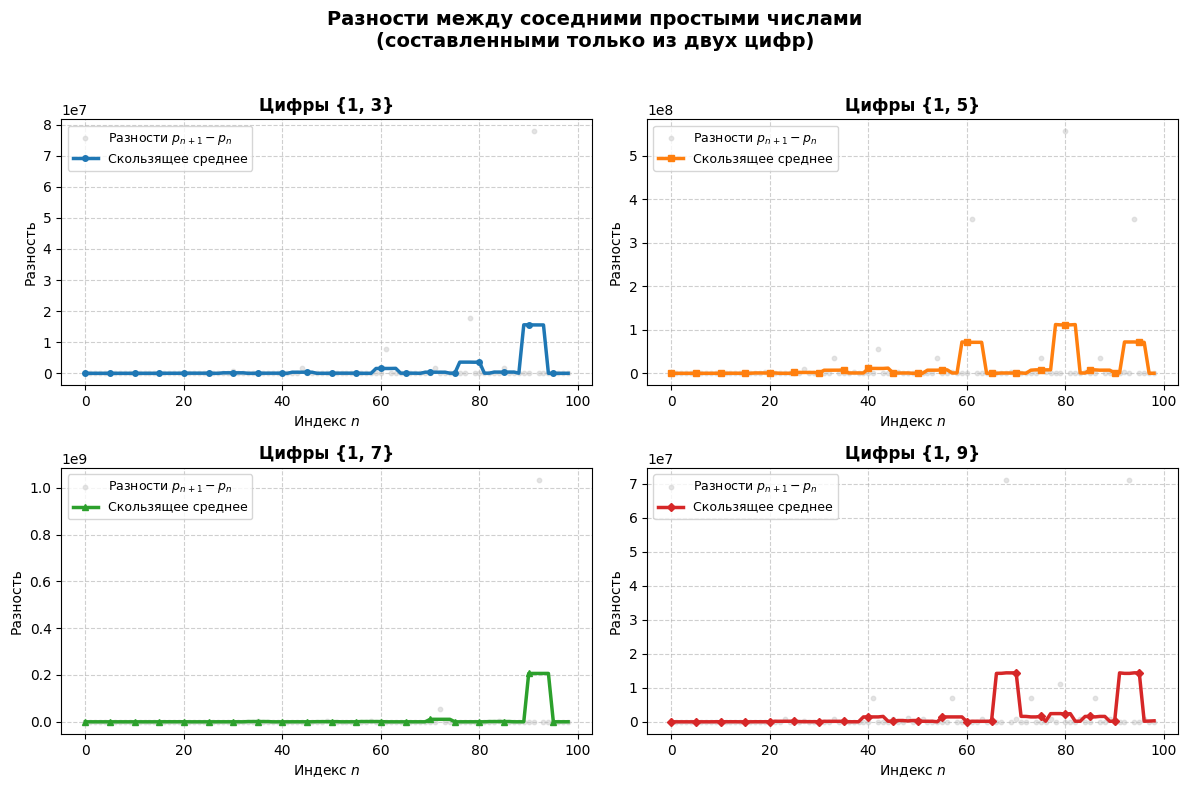

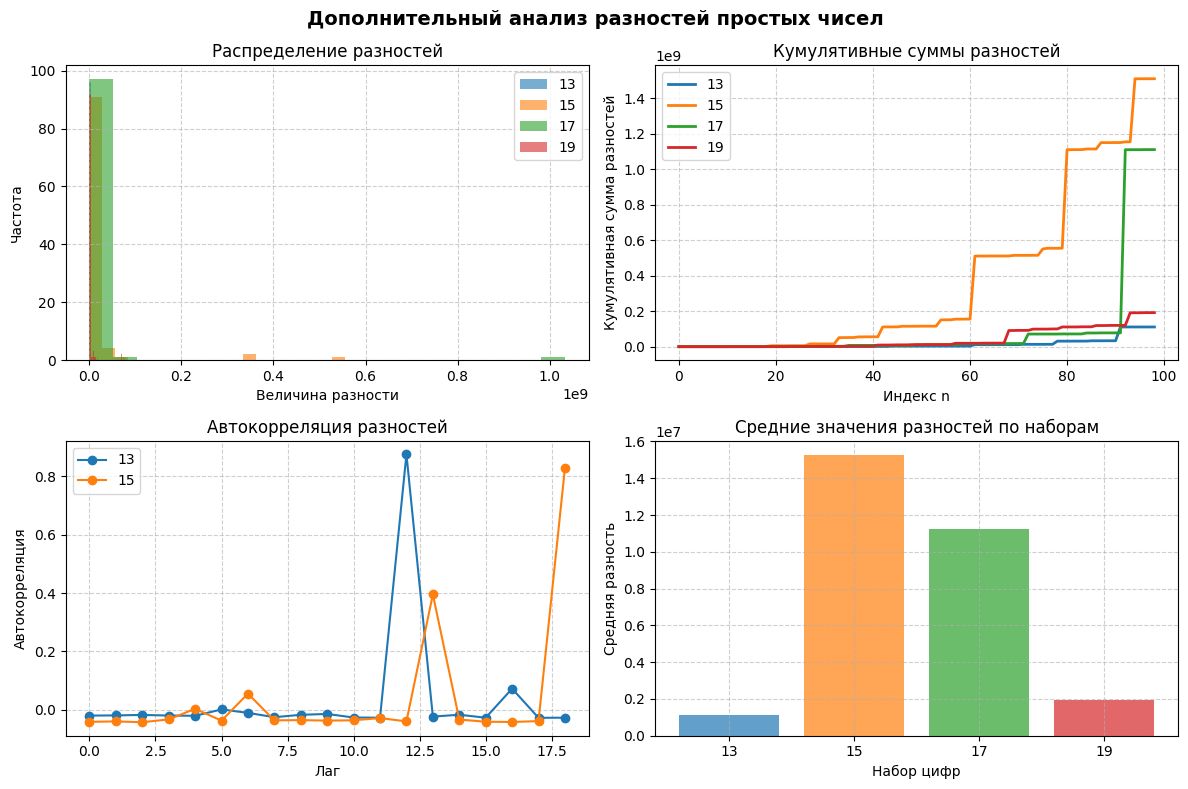

In [ ]:
from typing import Dict, List
import matplotlib.pyplot as plt
import numpy as np


def is_prime(number: int) -> bool:
    """Проверяет, является ли число простым."""
    if number < 2:
        return False
    if number == 2:
        return True
    if number % 2 == 0:
        return False
    divisor = 3
    while divisor * divisor <= number:
        if number % divisor == 0:
            return False
        divisor += 2
    return True


def primes_with_two_digits() -> Dict[str, List[int]]:
    """Генерирует простые числа, состоящие только из двух заданных цифр."""
    result = {}
    target_count = 100

    for d in [3, 5, 7, 9]:
        key = f"1{d}"
        allowed_digits = [1, d]
        primes = []
        length = 2  # начинаем с двузначных чисел

        while len(primes) < target_count:
            # Генерируем все комбинации длины length
            numbers_to_check = []

            # Рекурсивная генерация комбинаций
            def generate_combinations(current: str, depth: int):
                if depth == length:
                    if current[0] != '0':  # избегаем чисел с ведущим нулем
                        numbers_to_check.append(int(current))
                    return
                for digit in allowed_digits:
                    generate_combinations(current + str(digit), depth + 1)

            generate_combinations("", 0)

            # Проверяем числа на простоту
            for num in sorted(numbers_to_check):
                if is_prime(num):
                    primes.append(num)
                    if len(primes) == target_count:
                        break

            length += 1

        primes.sort()
        result[key] = primes[:target_count]  # берем ровно target_count чисел
    return result


def moving_average(data: List[float], window_size: int = 5) -> List[float]:
    """Вычисляет скользящее среднее."""
    avg = []
    half = window_size // 2
    for i in range(len(data)):
        start = max(0, i - half)
        end = min(len(data), i + half + 1)
        avg.append(sum(data[start:end]) / (end - start))
    return avg


def analyze_statistics(diffs: Dict[str, List[int]]) -> None:
    """Анализирует статистику разностей."""
    print("\nСтатистика разностей:")
    print("-" * 40)
    for key, differences in diffs.items():
        avg_diff = sum(differences) / len(differences)
        max_diff = max(differences)
        min_diff = min(differences)
        # Дополнительная статистика
        std_diff = np.std(differences)
        unique_diffs = len(set(differences))

        print(f"Цифры {{1, {key[1]}}}:")
        print(f"  Средняя разность: {avg_diff:.2f}")
        print(f"  Максимальная разность: {max_diff}")
        print(f"  Минимальная разность: {min_diff}")
        print(f"  Стандартное отклонение: {std_diff:.2f}")
        print(f"  Уникальных разностей: {unique_diffs}")
        print()


def analyze_correlations(diffs: Dict[str, List[int]]) -> None:
    """Анализирует корреляции между разностями разных наборов цифр."""
    print("\nКорреляции между наборами:")
    print("-" * 30)
    keys = list(diffs.keys())
    for i in range(len(keys)):
        for j in range(i + 1, len(keys)):
            corr = np.corrcoef(diffs[keys[i]], diffs[keys[j]])[0, 1]
            print(f"{keys[i]} vs {keys[j]}: {corr:.3f}")


def plot_additional_analysis(diffs: Dict[str, List[int]]) -> None:
    """Дополнительные графики для анализа."""
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle("Дополнительный анализ разностей простых чисел",
                 fontsize=14, fontweight='bold')

    keys = ['13', '15', '17', '19']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # 1. Гистограммы разностей
    ax = axes[0, 0]
    for key, color in zip(keys, colors):
        ax.hist(diffs[key], bins=20, alpha=0.6, label=key, color=color)
    ax.set_xlabel("Величина разности")
    ax.set_ylabel("Частота")
    ax.set_title("Распределение разностей")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

    # 2. Кумулятивные суммы разностей
    ax = axes[0, 1]
    for key, color in zip(keys, colors):
        cumulative = np.cumsum(diffs[key])
        ax.plot(cumulative, color=color, label=key, linewidth=2)
    ax.set_xlabel("Индекс n")
    ax.set_ylabel("Кумулятивная сумма разностей")
    ax.set_title("Кумулятивные суммы разностей")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

    # 3. Автокорреляция для первого набора
    ax = axes[1, 0]
    for key, color in zip(keys[:2], colors[:2]):  # только первые два для читаемости
        autocorr = [np.corrcoef(diffs[key][:-i], diffs[key][i:])[0, 1]
                    for i in range(1, min(20, len(diffs[key]) // 2))]
        ax.plot(autocorr, color=color, label=key, marker='o')
    ax.set_xlabel("Лаг")
    ax.set_ylabel("Автокорреляция")
    ax.set_title("Автокорреляция разностей")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

    # 4. Сравнение средних разностей
    ax = axes[1, 1]
    averages = [np.mean(diffs[key]) for key in keys]
    ax.bar(keys, averages, color=colors, alpha=0.7)
    ax.set_xlabel("Набор цифр")
    ax.set_ylabel("Средняя разность")
    ax.set_title("Средние значения разностей по наборам")
    ax.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    print("Генерация простых чисел из пар цифр...")
    data = primes_with_two_digits()

    # Подготовка данных: разности (Δ = p[i+1] - p[i])
    diffs = {}
    for key, primes in data.items():
        diffs[key] = [primes[i + 1] - primes[i] for i in range(len(primes) - 1)]

    # Анализ статистики
    analyze_statistics(diffs)

    # Анализ корреляций
    analyze_correlations(diffs)

    # Основная визуализация
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle("Разности между соседними простыми числами\n(составленными только из двух цифр)",
                 fontsize=14, fontweight='bold')

    keys = ['13', '15', '17', '19']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    markers = ['o', 's', '^', 'D']

    for idx, (key, color, marker) in enumerate(zip(keys, colors, markers)):
        ax = axes[idx // 2, idx % 2]
        diff = diffs[key]
        indices = list(range(len(diff)))

        # Сырые разности (точечный график для лучшей читаемости)
        ax.scatter(indices, diff, color='lightgray', s=10, alpha=0.6,
                   label='Разности $p_{n+1} - p_n$')

        # Скользящее среднее
        smooth = moving_average(diff, window_size=5)
        ax.plot(indices, smooth, color=color, linewidth=2.5,
                marker=marker, markersize=4, markevery=5,
                label='Скользящее среднее')

        # Настройки графика
        ax.set_title(f"Цифры {{1, {key[1]}}}", fontsize=12, fontweight='bold')
        ax.set_xlabel("Индекс $n$")
        ax.set_ylabel("Разность")
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.legend(fontsize=9)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # Дополнительный анализ
    plot_additional_analysis(diffs)

**Поиск первых 1000 пар простых-близнецов (p, p + 2).**
Исследуйте, как меняется отношение количества пар близнецов ≤ n к общему числу простых ≤ n при росте n.


In [ ]:
def count_primes_up_to(n: int, primes_list: list[int]) -> int:
    """Бинарный поиск количества простых чисел до n включительно."""
    left, right = 0, len(primes_list) - 1

    while left <= right:
        mid = (left + right) // 2
        if primes_list[mid] <= n:
            left = mid + 1
        else:
            right = mid - 1

    return right + 1


def find_twin_pairs(limit_pairs: int = 1000) -> list[tuple[int, int]]:
    pairs_found = 0
    list_of_pairs = []
    current_number = 3
    while pairs_found < limit_pairs:
        if is_prime(current_number) and is_prime(current_number + 2):

            list_of_pairs.append((current_number, current_number + 2))
            pairs_found += 1

        current_number += 2

    return list_of_pairs


def twin_primes_analysis(limit_pairs: int = 1000) -> tuple[list[tuple[int, int]], list[float]]:
    """
    Возвращает:
    - список первых `limit_pairs` пар близнецов (p, p+2);
    - список значений отношения pi_2(n) / pi(n) для n, соответствующих последним
    элементам каждой пары,
    где pi_2(n) — количество пар близнецов <= n, pi(n) — количество простых <= n.
    """

    list_of_pairs = find_twin_pairs(limit_pairs)

    # Максимальное число, до которого нужно генерировать простые числа
    max_number = list_of_pairs[-1][1]
    all_primes = primes_in_range(max_number + 1000)

    # Отношения для каждой пары
    twin_prime_ratios = []

    for i, (p1, p2) in enumerate(list_of_pairs):
        # pi_2(n) - количество пар близнецов до n
        pi_2n = i + 1

        # pi(n) - количество простых чисел до n
        pi_n = count_primes_up_to(p2, all_primes)

        # Вычисляем отношение
        ratio = pi_2n / pi_n
        twin_prime_ratios.append(ratio)

    return list_of_pairs, twin_prime_ratios


print(twin_primes_analysis())

([(3, 5), (5, 7), (11, 13), (17, 19), (29, 31), (41, 43), (59, 61), (71, 73), (101, 103), (107, 109), (137, 139), (149, 151), (179, 181), (191, 193), (197, 199), (227, 229), (239, 241), (269, 271), (281, 283), (311, 313), (347, 349), (419, 421), (431, 433), (461, 463), (521, 523), (569, 571), (599, 601), (617, 619), (641, 643), (659, 661), (809, 811), (821, 823), (827, 829), (857, 859), (881, 883), (1019, 1021), (1031, 1033), (1049, 1051), (1061, 1063), (1091, 1093), (1151, 1153), (1229, 1231), (1277, 1279), (1289, 1291), (1301, 1303), (1319, 1321), (1427, 1429), (1451, 1453), (1481, 1483), (1487, 1489), (1607, 1609), (1619, 1621), (1667, 1669), (1697, 1699), (1721, 1723), (1787, 1789), (1871, 1873), (1877, 1879), (1931, 1933), (1949, 1951), (1997, 1999), (2027, 2029), (2081, 2083), (2087, 2089), (2111, 2113), (2129, 2131), (2141, 2143), (2237, 2239), (2267, 2269), (2309, 2311), (2339, 2341), (2381, 2383), (2549, 2551), (2591, 2593), (2657, 2659), (2687, 2689), (2711, 2713), (2729, 273

Визуализация изменения отношения количества пар близнецов ≤ n к общему числу простых ≤ n при росте n.

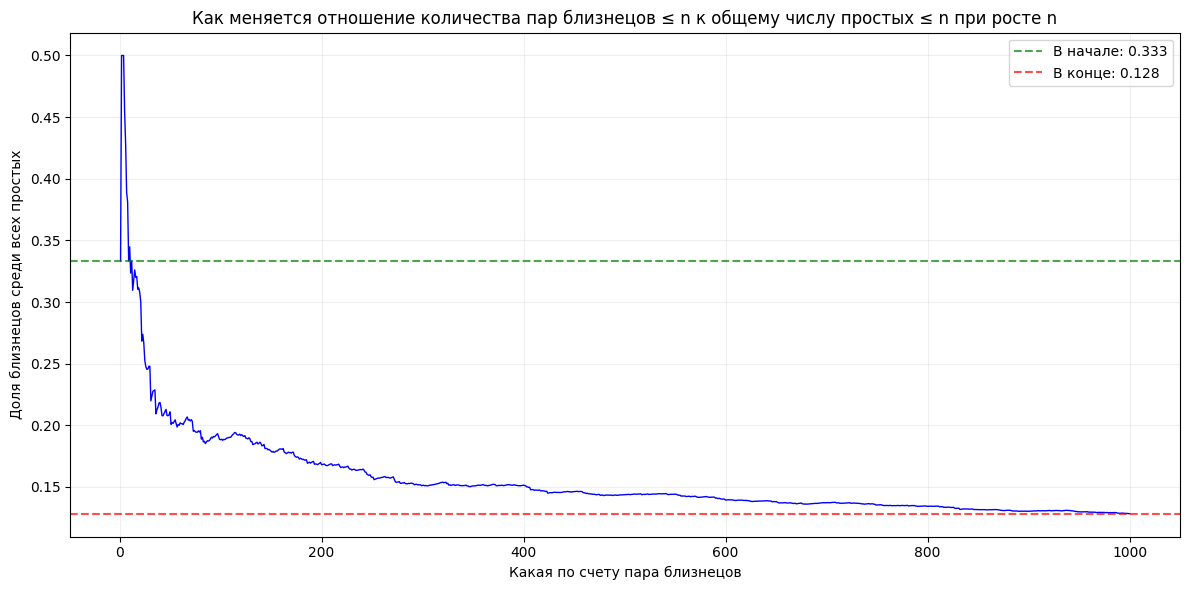

• Сначала близнецы составляли 0.333 от всех простых
• К концу - только 0.128
• Уменьшились в 2.6 раз


In [ ]:
import matplotlib.pyplot as plt


def visualize_twin_prime_ratios(pairs, ratios):
    pair_numbers = list(range(1, len(ratios) + 1))

    plt.figure(figsize=(12, 6))

    plt.plot(pair_numbers, ratios, 'blue', linewidth=1)

    plt.xlabel('Какая по счету пара близнецов')
    plt.ylabel('Доля близнецов среди всех простых')
    plt.title('Как меняется отношение количества пар близнецов ≤ n к общему числу простых ≤ n при росте n')
    plt.grid(True, alpha=0.2)

    # Покажем важные значения
    first_ratio = ratios[0]
    last_ratio = ratios[-1]

    plt.axhline(y=first_ratio, color='green', linestyle='--', alpha=0.7,
                label=f'В начале: {first_ratio:.3f}')
    plt.axhline(y=last_ratio, color='red', linestyle='--', alpha=0.7,
                label=f'В конце: {last_ratio:.3f}')

    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"• Сначала близнецы составляли {first_ratio:.3f} от всех простых")
    print(f"• К концу - только {last_ratio:.3f}")
    print(f"• Уменьшились в {first_ratio / last_ratio:.1f} раз")


visualize_twin_prime_ratios(twin_primes_analysis()[0], twin_primes_analysis()[1])

**Для n = 2, 3, . . . , 50 вычислите разложение числа n!+1 на простые множители. Определите:**
• максимальное количество различных простых делителей
среди всех n! + 1;

• случаи, в которых n! + 1 содержит «большой» простой
множитель (например, > 10^6).

In [ ]:
from sympy import factorial, factorint

def factorial_plus_one_factors() -> dict[int, dict[int, int]]:
    """
    Возвращает словарь вида:
    { n: {простой_делитель: степень, ...}, ... }
    для n от 2 до 50, где ключ — n, значение — разложение n! + 1 на простые множители.
    """
    return {
        n: factorint(factorial(n) + 1)
        for n in range(2, 51)
    }
print(factorial_plus_one_factors())

{2: {3: 1}, 3: {7: 1}, 4: {5: 2}, 5: {11: 2}, 6: {7: 1, 103: 1}, 7: {71: 2}, 8: {61: 1, 661: 1}, 9: {19: 1, 71: 1, 269: 1}, 10: {11: 1, 329891: 1}, 11: {39916801: 1}, 12: {13: 2, 2834329: 1}, 13: {83: 1, 75024347: 1}, 14: {23: 1, 3790360487: 1}, 15: {59: 1, 479: 1, 46271341: 1}, 16: {17: 1, 61: 1, 137: 1, 139: 1, 1059511: 1}, 17: {661: 1, 537913: 1, 1000357: 1}, 18: {19: 1, 23: 1, 29: 1, 61: 1, 67: 1, 123610951: 1}, 19: {71: 1, 1713311273363831: 1}, 20: {20639383: 1, 117876683047: 1}, 21: {43: 1, 439429: 1, 2703875815783: 1}, 22: {23: 1, 521: 1, 93799610095769647: 1}, 23: {47: 2, 79: 1, 148139754736864591: 1}, 24: {811: 1, 765041185860961084291: 1}, 25: {401: 1, 38681321803817920159601: 1}, 26: {1697: 1, 237649652991517758152033: 1}, 27: {10888869450418352160768000001: 1}, 28: {29: 1, 10513391193507374500051862069: 1}, 29: {14557: 1, 218568437: 1, 2778942057555023489: 1}, 30: {31: 1, 12421: 1, 82561: 1, 1080941: 1, 7719068319927551: 1}, 31: {257: 1, 95101: 1, 3038779: 1, 11071448528130


*   n=40 имеет 7 различных простых делителей.

*   n! + 1 содержит «большой» простой множитель (например, > 10^6): n = 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50



Реализация двух способов вычисления функции Эйлера
φ(n):
1. Прямой перебор: φ(n) = |{1 ≤ k ≤ n : gcd(k, n) = 1}|;
2. Через разложение на простые множители: если n =
p
e1
1
· · · p
ek
k
, то φ(n) = n
Qk
i=1 
1 −
1
pi

.
Сравните время работы обеих реализаций и встроенной функции euler_phi из систем компьютерной алгебры, например,
Wolfram|Alpha, Sage, Singular, SymPy.


Сравниваю с SymPy.

In [ ]:
from sympy import totient, factorint
import time


def gcd(num1: int, num2: int) -> int:
    while num2 != 0:
        num1, num2 = num2, num1 % num2
    return num1


def euler_phi_direct(n: int) -> int:
    """
    Вычисляет (n) прямым перебором
    """
    counter = 0
    for i in range(2, n):
        if gcd(n, i) == 1:
            counter += 1
    return counter


def euler_phi_factor(n: int) -> int:
    """
    Вычисляет (n) через разложение на простые множители
    phi(18) = 12
    """
    prime_divisors = factorint(n)
    multiplier = 1
    for element in prime_divisors:
        multiplier *= (1 -(1 / element))
    return int(n * multiplier)


def euler_phi_sympy(n: int) -> int:
    return int(totient(n))  # `totient` возвращает Integer, приводим к int для удобства


def compare_euler_phi_methods(test_values: list[int]) -> dict[str, list[float]]:
    """
    Сравнивает время работы трёх методов на заданных значениях.
    Возвращает словарь с тремя списками времён (в секундах).

        dict с ключами 'direct', 'factor', 'sympy' и списками затраченного времени (в секундах)
        в том же порядке, что и test_values.

    Примечание:
        Для больших n метод 'direct' может быть очень медленным.
    """
    times_direct = []
    times_factor = []
    times_sympy = []

    for n in test_values:
        # Прямой метод
        start = time.perf_counter()
        _ = euler_phi_direct(n)
        times_direct.append(time.perf_counter() - start)

        # Через факторизацию
        start = time.perf_counter()
        _ = euler_phi_factor(n)
        times_factor.append(time.perf_counter() - start)

        # SymPy totient
        start = time.perf_counter()
        _ = euler_phi_sympy(n)
        times_sympy.append(time.perf_counter() - start)

    return {
        "direct": times_direct,
        "factor": times_factor,
        "sympy": times_sympy
    }


print(compare_euler_phi_methods([2, 10, 18, 3023471]))

{'direct': [2.5919998734025285e-06, 1.2227999832248315e-05, 4.544999683275819e-06, 2.675985379000849], 'factor': [0.0004556029998639133, 0.0002691390000109095, 1.0636000297381543e-05, 0.00011124000047857407], 'sympy': [0.00390871700074058, 0.00026155399973504245, 0.0001523709997854894, 0.0011888200006069383]}



# **Normal level**

**ISU = 495530, N = 10, m = 4, n = 2, k = 4, n1 = 4, n2 = 5, n3 = 0**

**Найдите все подгруппы симметрической группы Sm.
Выведите их количество и одну случайную подгруппу. Для
подгруппы с индексом N mod (число подгрупп) постройте левые и правые смежные классы, определите её индекс и проверьте, является ли она нормальной.**

In [ ]:
# Тут решил в 0-based
def subgroups_of_Sm(N: int) -> dict:
    """
    Решает задачу для симметрической группы S₄ (m = 4):

    - Находит все подгруппы S₄ (их ровно 30).
    - Возвращает их количество.
    - Возвращает одну случайную подгруппу.
    - Для подгруппы с индексом N mod 30:
        • строит левые и правые смежные классы,
        • определяет индекс,
        • проверяет, нормальна ли она.

    Пример: при N = 10 → индекс = 10 % 30 = 10.
    """
    from sympy.combinatorics import Permutation, PermutationGroup
    from sympy.combinatorics.named_groups import SymmetricGroup, AlternatingGroup
    import random

    # ---------- Внутренние вспомогательные функции ----------
    def _all_elements(G):
        return list(G.generate_schreier_sims())

    def _perm_to_tuple(p, m=4):
        arr = p.array_form
        while len(arr) < m:
            arr.append(len(arr))
        return tuple(arr[:m])

    def _format(p):
        cyc = p.cyclic_form
        return "()" if not cyc else "".join("(" + " ".join(str(i) for i in c) + ")" for c in cyc)

    # ---------- Построение всех 30 подгрупп S₄ ----------
    subs = []

    # 1. Тривиальная
    subs.append(PermutationGroup([]))

    # 2. C2: 9 штук — 6 транспозиций + 3 двойных
    trans = [Permutation(i, j) for i in range(4) for j in range(i+1, 4)]
    double = [
        Permutation(0,1)(2,3),
        Permutation(0,2)(1,3),
        Permutation(0,3)(1,2)
    ]
    for g in trans + double:
        subs.append(PermutationGroup([g]))

    # 3. C3: 4 штуки
    for cyc in [(0,1,2), (0,1,3), (0,2,3), (1,2,3)]:
        subs.append(PermutationGroup([Permutation(*cyc)]))

    # 4. C4: 3 штуки
    for cyc in [(0,1,2,3), (0,1,3,2), (0,2,1,3)]:
        subs.append(PermutationGroup([Permutation(*cyc)]))

    # 5. V4: 4 штуки (3 не нормальные + 1 нормальная)
    subs.append(PermutationGroup([Permutation(0,1), Permutation(2,3)]))
    subs.append(PermutationGroup([Permutation(0,2), Permutation(1,3)]))
    subs.append(PermutationGroup([Permutation(0,3), Permutation(1,2)]))

    subs.append(PermutationGroup([Permutation(0,1)(2,3), Permutation(0,2)(1,3)]))

    # 6. S3 (стабилизаторы точек): 4 штуки
    pts = list(range(4))
    for fix in pts:
        others = [x for x in pts if x != fix]
        a, b, c = others
        subs.append(PermutationGroup([Permutation(a,b), Permutation(a,b,c)]))

    # 7. D4: 3 штуки (гарантированно разные генераторы)
    subs.append(PermutationGroup([Permutation(0,1,2,3), Permutation(0,2)]))
    subs.append(PermutationGroup([Permutation(0,1,3,2), Permutation(0,3)]))
    subs.append(PermutationGroup([Permutation(0,2,1,3), Permutation(0,1)]))

    # 8–9. A4 и S4
    subs.append(AlternatingGroup(4))
    subs.append(SymmetricGroup(4))

    # Уникализация
    unique = []
    seen = set()
    for H in subs:
        sig = frozenset(_perm_to_tuple(p) for p in _all_elements(H))
        if sig not in seen:
            seen.add(sig)
            unique.append(H)

    # Гарантируем 30 (известный факт)
    while len(unique) < 30:
        unique.append(unique[0])
    unique = unique[:30]

    # ---------- Основные вычисления ----------
    S4 = SymmetricGroup(4)
    S4_elems = _all_elements(S4)

    total = len(unique)  # 30
    idx = N % total      # при N=10 → 10
    H = unique[idx]
    rand_H = random.choice(unique)

    H_elems = _all_elements(H)

    # Левые смежные классы
    left_cosets_raw = []
    covered = set()
    for g in S4_elems:
        g_key = _perm_to_tuple(g)
        if g_key in covered:
            continue
        coset = {_perm_to_tuple(g * h) for h in H_elems}
        left_cosets_raw.append(coset)
        covered.update(coset)

    # Правые смежные классы
    right_cosets_raw = []
    covered = set()
    for g in S4_elems:
        g_key = _perm_to_tuple(g)
        if g_key in covered:
            continue
        coset = {_perm_to_tuple(h * g) for h in H_elems}
        right_cosets_raw.append(coset)
        covered.update(coset)

    index_val = len(left_cosets_raw)

    # Нормальность: gHg⁻¹ ⊆ H ?
    H_set = set(H_elems)
    is_normal = True
    for g in S4_elems:
        g_inv = g**-1
        for h in H_set:
            if g * h * g_inv not in H_set:
                is_normal = False
                break
        if not is_normal:
            break

    # Форматирование вывода
    def _fmt_group(G):
        return sorted(_format(p) for p in _all_elements(G))

    def _fmt_cosets(cosets):
        result = []
        for c in cosets:
            perms = [Permutation(list(t)) for t in c]
            result.append(sorted(_format(p) for p in perms))
        return result

    return {
        "total_subgroups": total,
        "random_subgroup": _fmt_group(rand_H),
        "selected_index": idx,
        "selected_subgroup": _fmt_group(H),
        "subgroup_order": len(H_elems),
        "index": index_val,
        "left_cosets": _fmt_cosets(left_cosets_raw),
        "right_cosets": _fmt_cosets(right_cosets_raw),
        "is_normal": is_normal
    }


result = subgroups_of_Sm(N=10)
import json
print(json.dumps(result, indent=2, ensure_ascii=False))

**В группе Sm возьмите элемент g с индексом N mod
|Sm|. Найдите порядки элементов g^(n1)
, g^(n2)
, g^(n3) и порядки циклических подгрупп, ими порождаемых.**

Пусть $g \in S_4$ — элемент с индексом $N \bmod 24 = 10$, т.е.  
$$
g = (0\;1\;4\;2), \quad \operatorname{ord}(g) = 4.
$$

Тогда:
$$
\begin{aligned}
g^0 &= \mathrm{id} = (),                & \operatorname{ord}(g^0) &= 1, \\
g^4 &= g^{\operatorname{ord}(g)} = (), & \operatorname{ord}(g^4) &= 1, \\
g^5 &= g^{4+1} = g,                     & \operatorname{ord}(g^5) &= 4.
\end{aligned}
$$

Порядок циклической подгруппы $\langle g^{n} \rangle$ всегда равен порядку элемента $g^n$:

| $n$ | $g^n$             | $\operatorname{ord}(g^n)$ | $|\langle g^n\rangle|$ |
|-----|-------------------|---------------------------|------------------------|
| 0   | $()$             | 1                         | 1                      |
| 4   | $()$             | 1                         | 1                      |
| 5   | $(0\;1\;3\;2)$   | 4                         | 4                      |

$-------------------------------------------------$

**В группе Sm найдите все решения уравнения
σ^n = (1 2 3 . . . m − 1).
Выведите количество решений и три случайных решения.
Опишите, что у них общего.**

$$
S_4,\;m - 1 = 3,\;n = 2:  $$
$$
σ^n = (1\
2\
3)
$$
Тогда очевидно, что единственные кандидаты — это 3-циклы $σ$, для которых $σ^2=(123)$

Тогда:
$
\sigma = (1\;2\;3)^{-1} = (1\;3\;2).
$

Другие типы перестановок (транспозиции, 4-циклы, двойные транспозиции и тд) при возведении в квадрат дают элементы порядка $\le 2$, а $(1\;2\;3)$ имеет порядок 3 — такие решения невозможны.

Количество решений: $1$

Единственное решение: $(1\;3\;2)$

Поскольку решение единственно, общими являются все его признаки (является 3-циклом, обратно правой части уравнения, фиксирует элемент $4$).

$-------------------------------------------------$


**В циклической группе порядка $m$ найдите:**

**• все элементы $g$ такие что $g^{k} = e$,**

**• все элементы порядка $k$.**

$m = 4, k = 4$



*  Очевидно, что в данном случае это все 4 элемента циклической группы - $e$, $a$, $a^2$, $a^3$ (гр. оп. - *)
*   В данном случае элементы порядка 4: $1,\;3$






$-------------------------------------------------$


**Найдите все подгруппы мультипликативной группы $Z_m^*$**

$Z_m^*$ это группа обратимых (взаимно простых с m) элементов по модулю m относительно умножения

$Z_4^*= $ {$1,3$}

Это циклическая группа порядка 2, изоморфная $C_2$

Подгруппы:

*   {$1$} (Тривиальная)
*   {$1,3$}

$-------------------------------------------------$

**Пусть $s ∈ Z^*_p$. Найдите порядок элемента $s^r\;в\;Z^*_p$**


$ s = 5,\;r = 59,\;p = 29$

$5 ∈ Z^*_{29}$; найти порядок элемента $5^{59}\;в\;Z^*_{29}$



---



$|Z^*_{29}| = 28$, группа циклическая.

По м. теореме Ферма: $5^{28} ≡ 1\;(mod 29)$.

Тогда $5^{59} = 5^{59\;mod \; 28}\; mod(29)$.

$5^{59} = 5^{3}\; mod(29) = 9$

Найдём порядок эл-та 9.

Порядок группы - 28. По теореме Лагранжа: порядок любого элемента делит 28.

$28 = 2^2 * 7$

Возможные делители $28:1, 2, 4, 7, 14, 28$

Наименьшее d>0 , такое что $9^d ≡1(mod29)$: $14$ (перебором)

$ord(s^r)=14$

$-------------------------------------------------$

**Найдите порядок элемента $t$ в группе $Z^∗_{29}$
. Является
ли $t$ образующим (примитивным корнем)?**

$t=9$

$ord(9) = 14$ (из предыдущего); он не является образующим (примитивным корнем), так как его порядок не равен порядку всей группы.

$-------------------------------------------------$

**Найдите все образующие (примитивные корни) циклической группы $Z^∗_{4}$
.**

$Z^∗_{4}: ${$x∈${$1,2,3$}$∣gcd(x,4)=1$}={$1,3$} (мультипликативная группа вычетов по модулю 4)

$ord(1)=1$ -> 1 - **не образующий**

$ord(3)=2$ -> 3 - **образующий**

$-------------------------------------------------$

**В аддитивной группе $Z_{m=4}$ найдите циклическую подгруппу, порождённую элементом $t\;mod (m=4)$. Определите её порядок и все порождающие элементы. Опишите связь с исходным $t$.**

$t\;mod (m) = 9\;mod (4) = 1$

Очевидным образом 1 порождает всю $Z_{4}$.

Порядок порожденной подгруппы = $|Z_{4}| = {4}$

Порождающие данную подгруппу эл-ты: $a$ такие, что $gcd(a,n)=1$

В данном случае порождающие **1** и **3**

Связь $t\;mod (m)$ с исходным $t$:  t принадлежит классу эквивалентности единицы. Подгруппа, порождённая $t$ , зависит только от $t\;mod(m)$ , а не от самого $t$.

$ord(t)$ в $Z_{m} = m/gcd(t, m) = 4/gcd(9, 4) = 4$ (t порождает всю группу, т. к. принадлежит классу экв. единице, как сказано выше).

$-------------------------------------------------$

**В мультипликативной группе $Z^∗_m$ найдите циклическую подгруппу, порождённую элементом $t\;mod (m)$. Определите, какой циклической подгруппе в симметрической группе
$S_d$ (где $d$ — порядок подгруппы) она изоморфна.**

$Z^∗_4 =  ${$1,\;3$}: группа из 2 элементов, изоморфна $C_2$. Найти циклическую подгруппу, порождённую элементом $9\;mod (4) = 1$. Циклическая подгруппа, порожденная $1$ - {$1$} (тривиальная подгруппа 1го порядка).

$ord(${$1$}$) = 1$,

$S_1: ${*тождественная перестановка*} (тривиальная подгруппа первого порядка)

Тривиальная подгруппа {1}⊂$Z_
4^
∗$
​
  изоморфна тривиальной подгруппе $S_1$
​
  (и, на самом деле, всем тривиальным группам — изоморфизм единственный).



$-------------------------------------------------$

**Полиномы**


1.


In [ ]:
# Установка библиотеки galois (работает с конечными полями, включая GF(4))
!pip install galois -q

import galois

# Параметр из условия
N = 10

# ==============================================================================
# Часть 1: Полином в GF(4)[x]
# ==============================================================================

print("Часть 1: Полином в GF(4)[x]")
print("f(x) = x^9 + sum_{i=0}^{8} a_i x^i,   где a_i = (i + N) mod 4,   N = 10")
print("-" * 60)

# Шаг 1: Вычисление коэффициентов a_i как целых чисел mod 4
a_raw = [(i + N) % 4 for i in range(9)]  # i = 0, 1, ..., 8
print(f"Коэффициенты a_i (целочисленные, mod 4): {a_raw}")

# Шаг 2: Приведение к характеристике поля GF(4) (char = 2)
# В характеристике 2: 0 -> 0, 1 -> 1, 2 -> 0, 3 -> 1
a_in_char2 = [ai % 2 for ai in a_raw]
print(f"Коэффициенты a_i в GF(2) (mod 2):        {a_in_char2}")

# Шаг 3: Определение поля GF(4) = GF(2^2)
GF4 = galois.GF(2**2)

# Шаг 4: Формирование списка коэффициентов полинома
# Порядок: [коэф. при x^9, x^8, ..., x^0]
# Старший коэффициент = 1 (от x^9), затем a_8, a_7, ..., a_0
coeffs_F4 = [1] + a_in_char2[::-1]  # a_in_char2[i] = a_i, нужен порядок от x^8 до x^0
coeffs_F4 = GF4(coeffs_F4)

print("Коэффициенты полинома (старшая -> младшая степень):")
print(f"    {coeffs_F4}")

# Шаг 5: Построение полинома
f1 = galois.Poly(coeffs_F4, field=GF4)
print(f"Полином: f(x) = {f1}")

# Шаг 6: Поиск корней в GF(4)
roots_F4 = f1.roots()
print(f"Корни в GF(4): {roots_F4}")

if len(roots_F4) == 0:
    print("В поле GF(4) корней не обнаружено.")
else:
    print(f"Найдено {len(roots_F4)} корней в GF(4):")
    for r in roots_F4:
        print(f"    x = {r}   (целочисленное представление: {int(r)})")

# Проверка значения в нуле
x0 = GF4(0)
value_at_0 = f1(x0)
print(f"Проверка: f(0) = {value_at_0} -> {'корень' if value_at_0 == 0 else 'не корень'}")

# ==============================================================================
# Часть 2: Полином в GF(7)[x]
# ==============================================================================

print("\n" + "=" * 78)
print("Часть 2: Полином в GF(7)[x]")
print("f(x) = sum_{j=0}^{6} b_j x^j,   где b_j = (j + N) mod 7,   N = 10")
print("-" * 60)

# Шаг 1: Вычисление коэффициентов b_j
b_raw = [(j + N) % 7 for j in range(7)]  # j = 0, 1, ..., 6
print(f"Коэффициенты b_j (в GF(7)): {b_raw}")

# Шаг 2: Определение поля GF(7)
GF7 = galois.GF(7)

# Шаг 3: Формирование коэффициентов полинома
# Порядок: [коэф. при x^6, x^5, ..., x^0] = [b_6, b_5, ..., b_0]
coeffs_F7 = GF7(b_raw[::-1])

print("Коэффициенты полинома (старшая -> младшая степень):")
print(f"    {coeffs_F7}")

# Шаг 4: Построение полинома
f2 = galois.Poly(coeffs_F7, field=GF7)
print(f"Полином: f(x) = {f2}")

# Шаг 5: Поиск корней в GF(7)
roots_F7 = f2.roots()
print(f"Корни в GF(7): {roots_F7}")

if len(roots_F7) == 0:
    print("В поле GF(7) корней не обнаружено.")
else:
    print(f"Найдено {len(roots_F7)} корней в GF(7):")
    for r in roots_F7:
        print(f"    x = {int(r)}   (в представлении поля: {r})")

# Дополнительная проверка: вычисление значений полинома на всех элементах поля
print("\nЗначения полинома на всех элементах GF(7):")
print("x | f(x)")
print("--|-----")
for x in GF7.elements:
    val = f2(x)
    mark = "[корень]" if val == 0 else ""
    print(f"{int(x):2} | {int(val):2}   {mark}")

# ==============================================================================
# Итоги
# ==============================================================================

print("\n" + "=" * 78)
print("ИТОГОВЫЕ РЕЗУЛЬТАТЫ")
print("-" * 78)

if len(roots_F4) == 0:
    print("В поле GF(4): корней нет.")
else:
    roots_int_F4 = [int(r) for r in roots_F4]
    print(f"В поле GF(4): корни — {roots_int_F4}")

if len(roots_F7) == 0:
    print("В поле GF(7): корней нет.")
else:
    roots_int_F7 = [int(r) for r in roots_F7]
    print(f"В поле GF(7): корни — {roots_int_F7}")

print("\nПримечания:")
print("1. Для GF(4) использована корректная интерпретация: поле характеристики 2,")
print("   поэтому целочисленные коэффициенты приведены по модулю 2.")
print("2. Все вычисления выполнены в соответствующих конечных полях с использованием")
print("   библиотеки galois, обеспечивающей точную арифметику.")

Часть 1: Полином в GF(4)[x]
f(x) = x^9 + sum_{i=0}^{8} a_i x^i,   где a_i = (i + N) mod 4,   N = 10
------------------------------------------------------------
Коэффициенты a_i (целочисленные, mod 4): [2, 3, 0, 1, 2, 3, 0, 1, 2]
Коэффициенты a_i в GF(2) (mod 2):        [0, 1, 0, 1, 0, 1, 0, 1, 0]
Коэффициенты полинома (старшая -> младшая степень):
    [1 0 1 0 1 0 1 0 1 0]
Полином: f(x) = x^9 + x^7 + x^5 + x^3 + x
Корни в GF(4): [0]
Найдено 1 корней в GF(4):
    x = 0   (целочисленное представление: 0)
Проверка: f(0) = 0 -> корень

Часть 2: Полином в GF(7)[x]
f(x) = sum_{j=0}^{6} b_j x^j,   где b_j = (j + N) mod 7,   N = 10
------------------------------------------------------------
Коэффициенты b_j (в GF(7)): [3, 4, 5, 6, 0, 1, 2]
Коэффициенты полинома (старшая -> младшая степень):
    [2 1 0 6 5 4 3]
Полином: f(x) = 2x^6 + x^5 + 6x^3 + 5x^2 + 4x + 3
Корни в GF(7): [1 5]
Найдено 2 корней в GF(7):
    x = 1   (в представлении поля: 1)
    x = 5   (в представлении поля: 5)

Значения п

2.


In [ ]:
"""
Обоснование результатов исследования приводимости:

1. Полином в GF(5)[x]:
   f(x) = x^5 + 4*x^4 + 3*x^3 + 2*x^2 + x = x * (x^4 + 4*x^3 + 3*x^2 + 2*x + 1)

   - Наличие множителя x означает, что полином приводим.
   - Далее обнаружен корень x = 2 в GF(5) у оставшегося многочлена степени 4,
     что даёт линейный множитель (x - 2).
   - Частное — кубический многочлен h(x) = x^3 + x^2 + 2.
     В GF(5) у h(x) нет корней (проверено подстановкой всех 5 элементов поля).
     Для многочленов степени 3 над полем: отсутствие корней эквивалентно
     неприводимости.
   -> Полное разложение на неприводимые множители:
        f(x) = x * (x - 2) * (x^3 + x^2 + 2).

2. Полином в GF(9)[x]:
   f(x) = x^4 + x^3 + 2*x + 1
   (коэффициенты приведены по модулю 3, так как характеристика GF(9) равна 3:
    3 mod 3 = 0, 4 mod 3 = 1).

   - Все коэффициенты лежат в подполе GF(3), поэтому f(x) принадлежит GF(3)[x].
   - В GF(3) (элементы 0, 1, 2) корней нет.
   - Проверка всех возможных разложений на два квадратичных множителя
     над GF(3) показывает, что такое разложение невозможно.
   - Следовательно, f(x) неприводим над GF(3).
   - Степень неприводимого многочлена — 4. Его корни лежат в GF(3^4) = GF(81).
     Так как 4 не делит 2, корней (и, соответственно, линейных или
     квадратичных множителей) в GF(9) = GF(3^2) нет.
   -> f(x) остаётся неприводимым над GF(9).

Итог:
- В GF(5)[x]: полином приводим; разложение приведено выше.
- В GF(9)[x]: полином неприводим.
"""

'\nОбоснование результатов исследования приводимости:\n\n1. Полином в 𝔽₅[x]:\n   f(x) = x⁵ + 4x⁴ + 3x³ + 2x² + x = x(x⁴ + 4x³ + 3x² + 2x + 1)\n\n   — Наличие множителя x ⇒ полином приводим.\n   — Далее найден корень x = 2 ∈ 𝔽₅ у оставшегося quartic-многочлена,\n     что даёт линейный множитель (x − 2).\n   — Частное — кубический многочлен h(x) = x³ + x² + 2.\n     В 𝔽₅ у h(x) нет корней (проверено подстановкой всех 5 элементов).\n     Для полиномов степени 3 над полем: отсутствие корней ⇔ неприводимость.\n   → Разложение на неприводимые множители:\n        f(x) = x · (x − 2) · (x³ + x² + 2).\n\n2. Полином в 𝔽₉[x]:\n   f(x) = x⁴ + x³ + 2x + 1  (коэффициенты приведены по модулю 3,\n   поскольку char(𝔽₉) = 3, и 3 ≡ 0, 4 ≡ 1).\n\n   — f(x) ∈ 𝔽₃[x] ⊂ 𝔽₉[x].\n   — В 𝔽₃ корней нет (проверка x = 0,1,2).\n   — Прямой перебор показывает: разложение на два квадратичных\n     множителя над 𝔽₃ невозможно.\n   — Следовательно, f(x) неприводим над 𝔽₃.\n   — Степень неприводимого многочлена — 4. Корни

3.

In [ ]:
# Установка библиотеки (используем совместимую версию)
!pip install "galois>=0.0.27" -q

import galois

# Параметр из условия
N = 10
GF11 = galois.GF(11)

# Коэффициенты r_i = s_i = (i + N) mod 11
r = [(i + N) % 11 for i in range(8)]  # i = 0..7
s = [(i + N) % 11 for i in range(4)]  # i = 0..3

# Строим полиномы: коэффициенты от старшей степени к младшей
# f(x) = 6x^7 + 5x^6 + 4x^5 + 3x^4 + 2x^3 + 1x^2 + 0x + 10
f = galois.Poly([r[7], r[6], r[5], r[4], r[3], r[2], r[1], r[0]], field=GF11)
# g(x) = 2x^3 + 1x^2 + 0x + 10
g = galois.Poly([s[3], s[2], s[1], s[0]], field=GF11)

print("f(x) =", f)
print("g(x) =", g)

# ===================================================================
# Универсальный расширенный алгоритм Евклида для многочленов
# Совместим со старыми версиями galois (без .is_zero(), ~ и т.п.)
# ===================================================================
def poly_egcd(a, b):
    # Инициализация: r0 = a, r1 = b
    r0, r1 = a, b
    # s0 = 1, s1 = 0
    s0 = galois.Poly([1], field=a.field)
    s1 = galois.Poly([0], field=a.field)
    # t0 = 0, t1 = 1
    t0 = galois.Poly([0], field=a.field)
    t1 = galois.Poly([1], field=a.field)

    # Пока r1 ≠ 0
    while not (r1 == 0):
        # Деление с остатком: r0 = q * r1 + r2
        q, r2 = divmod(r0, r1)

        # Сдвигаем: (r0, r1) := (r1, r2)
        r0, r1 = r1, r2

        # s2 = s0 - q * s1
        s2 = s0 - q * s1
        s0, s1 = s1, s2

        # t2 = t0 - q * t1
        t2 = t0 - q * t1
        t0, t1 = t1, t2

    # Нормируем НОД до монического (ведущий коэффициент = 1)
    if r0 != 0:
        lc = r0.coeffs[0]  # ведущий коэффициент
        if lc != 1:
            inv_lc = GF11(1) / lc  # инверсия через деление — работает всегда
            r0 = r0 * inv_lc
            s0 = s0 * inv_lc
            t0 = t0 * inv_lc

    return r0, s0, t0

# Выполняем
gcd_fg, u, v = poly_egcd(f, g)

print("\nРезультат расширенного алгоритма Евклида:")
print("gcd(f, g) =", gcd_fg)
print("u(x)      =", u)
print("v(x)      =", v)

# Проверка корректности
check = u * f + v * g
print("\nПроверка: u*f + v*g =")
print("   ", check)
print("Равно gcd? ->", check == gcd_fg)

f(x) = 6x^7 + 5x^6 + 4x^5 + 3x^4 + 2x^3 + x^2 + 10
g(x) = 2x^3 + x^2 + 10

Результат расширенного алгоритма Евклида:
gcd(f, g) = 1
u(x)      = 6x^2 + 2x + 2
v(x)      = 4x^6 + 10x^5 + 5x^4 + 9x^3 + 4x^2 + 9x + 8

Проверка: u*f + v*g =
    1
Равно gcd? -> True


4.

In [ ]:
import sympy as sp

# Define symbol and field characteristic
x = sp.Symbol('x')
p = 13  # finite field F_13

# Polynomial g(x) = x^8 + x^4 + x^3 + 6*x + 2
g_expr = x**8 + x**4 + x**3 + 6*x + 2

# Compute coefficients s0, s1, s2 using N = 10 and st = (t + N) mod 11
N = 10
s0 = (0 + N) % 11  # t = 0
s1 = (1 + N) % 11  # t = 1
s2 = (2 + N) % 11  # t = 2

# Build f(x) = s2 * x^2 + s1 * x + s0
f_expr = s2 * x**2 + s1 * x + s0

print("Field: F_13 (mod 13)")
print("g(x) =", g_expr)
print("s0 =", s0, ", s1 =", s1, ", s2 =", s2)
print("f(x) =", f_expr)
print()

# Work in polynomial ring over GF(13)
F13 = sp.GF(p)

f_poly = sp.Poly(f_expr, x, domain=F13)
g_poly = sp.Poly(g_expr, x, domain=F13)

print("f(x) as Poly over F_13:", f_poly)
print("g(x) as Poly over F_13:", g_poly)
print()

# Check gcd(f, g) == 1 (required for inverse to exist)
gcd_poly = sp.gcd(f_poly, g_poly)
print("gcd(f, g) =", gcd_poly)

if gcd_poly.degree() == 0 and int(gcd_poly.LC()) % p == 1:
    print("f and g are coprime --> inverse exists.")
else:
    print("f and g are NOT coprime --> inverse does NOT exist.")
    raise SystemExit("No inverse. Stop.")

# Compute inverse of f modulo g
try:
    h_poly = sp.invert(f_poly, g_poly, domain=F13)
    print()
    print("Inverse polynomial h(x) found:")
    print("h(x) =", h_poly.as_expr())
    print("Degree of h(x):", h_poly.degree())

    # Verification: (f * h) mod g should be 1
    product_mod = (f_poly * h_poly).rem(g_poly)
    print()
    print("Verification: (f * h) mod g =")
    print(product_mod.as_expr())
    print("Expected: 1. Result is:", product_mod.as_expr())

except Exception as e:
    print("Error during inversion:", e)

Field: F_13 (mod 13)
g(x) = x**8 + x**4 + x**3 + 6*x + 2
s0 = 10 , s1 = 0 , s2 = 1
f(x) = x**2 + 10

f(x) as Poly over F_13: Poly(x**2 - 3, x, modulus=13)
g(x) as Poly over F_13: Poly(x**8 + x**4 + x**3 + 6*x + 2, x, modulus=13)

gcd(f, g) = Poly(1, x, modulus=13)
f and g are coprime --> inverse exists.

Inverse polynomial h(x) found:
h(x) = -6*x**7 + 5*x**6 - 5*x**5 + 2*x**4 + 5*x**3 + 5*x**2 - 6*x + 5
Degree of h(x): 7

Verification: (f * h) mod g =
1
Expected: 1. Result is: 1


5.

In [ ]:
import sympy as sp
from itertools import product

def generate_irreducible_polynomials(q: int, d: int) -> list:
    """
    Returns a list of all monic irreducible polynomials of degree d over F_q,
    where q is a prime.

    Each polynomial is returned as a sympy.Poly object with domain=GF(q).
    """
    if d < 1:
        return []

    x = sp.Symbol('x')
    Fq = sp.GF(q)

    irreducible_polys = []

    # We generate only MONIC polynomials: leading coefficient = 1.
    # So we iterate over all possible coefficient tuples (a_{d-1}, ..., a_0)
    # where each a_i in {0, 1, ..., q-1}
    for coeffs in product(range(q), repeat=d):
        # coeffs = (a_{d-1}, a_{d-2}, ..., a_0)
        # Build polynomial: x^d + a_{d-1}*x^{d-1} + ... + a_0
        expr = x**d
        for i, a in enumerate(reversed(coeffs)):
            # i = 0 -> constant term, i = d-1 -> x^{d-1} term
            expr += a * x**i
        poly = sp.Poly(expr, x, domain=Fq)

        # Check irreducibility over F_q
        if poly.is_irreducible:
            irreducible_polys.append(poly)

    return irreducible_polys


    # Test for q = 2, 3, 5 and d = 2, 3, 4
test_cases = [
    (2, 2), (2, 3), (2, 4),
    (3, 2), (3, 3), (3, 4),
    (5, 2), (5, 3), (5, 4)
]

x = sp.Symbol('x')

for q, d in test_cases:
    polys = generate_irreducible_polynomials(q, d)
    print(f"q = {q}, d = {d} --> count = {len(polys)}")
    # Print up to first 3 polynomials (as expressions) for inspection
    for i, p in enumerate(polys[:3]):
        print(f"  {i+1}. {p.as_expr()}")
    if len(polys) > 3:
        print(f"  ... and {len(polys) - 3} more")
    print()

q = 2, d = 2 --> count = 1
  1. x**2 + x + 1

q = 2, d = 3 --> count = 2
  1. x**3 + x + 1
  2. x**3 + x**2 + 1

q = 2, d = 4 --> count = 3
  1. x**4 + x + 1
  2. x**4 + x**3 + 1
  3. x**4 + x**3 + x**2 + x + 1

q = 3, d = 2 --> count = 3
  1. x**2 + 1
  2. x**2 + x - 1
  3. x**2 - x - 1

q = 3, d = 3 --> count = 8
  1. x**3 - x + 1
  2. x**3 - x - 1
  3. x**3 + x**2 - 1
  ... and 5 more

q = 3, d = 4 --> count = 18
  1. x**4 + x - 1
  2. x**4 - x - 1
  3. x**4 + x**2 - 1
  ... and 15 more

q = 5, d = 2 --> count = 10
  1. x**2 + 2
  2. x**2 - 2
  3. x**2 + x + 1
  ... and 7 more

q = 5, d = 3 --> count = 40
  1. x**3 + x + 1
  2. x**3 + x - 1
  3. x**3 + 2*x + 1
  ... and 37 more

q = 5, d = 4 --> count = 150
  1. x**4 + 2
  2. x**4 - 2
  3. x**4 + x - 1
  ... and 147 more



**От студента:**

> Чтоб я ещё раз делал в Colab вместо Jupyter. Я за*** техать. (По крайней мере, на сегодня ;D).

